# Exploratory Data Analysis (EDA) Workshop
## Colombian Pension Fund Dataset - Colfondos S.A.

---

### 🎯 Learning Objectives

By the end of this workshop, you will:
- Perform systematic EDA on real government data from datos.gov.co
- Apply the 4 fundamental steps of EDA methodology
- Generate actionable insights from pension fund investment data
- Practice data cleaning and visualization techniques
- Understand how to communicate findings for policy decisions

---

### 📊 Dataset Context

**What are we analyzing?**
- Investment portfolio data from **Colfondos S.A. Pensiones y Cesantías**
- One of Colombia's major pension fund administrators
- Dataset contains ~8,400 investment records with 112 variables
- Includes bonds, stocks, and other financial instruments

**Why is this important?**
- Pension funds manage retirement savings for millions of Colombians
- Understanding investment patterns ensures financial stability
- Regulatory compliance and risk management are critical
- Public policy implications for retirement security

## 🚀 Step 0: Environment Setup

Let's start by setting up our working environment.

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration for better display
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Environment setup complete!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Environment setup complete!
Pandas version: 2.3.1
NumPy version: 2.3.2


**💡 Tip:** Always start with a clean environment setup. This ensures reproducibility!

## 📥 Step 1: Data Loading and Initial Exploration

### 1.1 Load the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('Colfondos_20250830.csv')

# Get basic information
print("📊 Dataset Loaded Successfully!")
print("="*50)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*50)


📊 Dataset Loaded Successfully!
Shape: 8,437 rows × 112 columns
Memory usage: 30.96 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Columns: 112 entries, Tipo de Entidad to Codigo CIIU
dtypes: float64(14), int64(49), object(49)
memory usage: 7.2+ MB


,Tipo de Entidad,Código Tipo Entidad,Código Tipo Patrimonio,Subtipo Patrimonio,Price Vendor,Unidad_Captura,Nro_Asignado_Por_La_Entidad,Tipo_Id_Emisor,Nro_Id_Emisor,Senal_Vinculado,Aval,Tipo ID Avalista,No. ID Avalista,Razon Social Avalista,No. ID Administrador,Cupon Principal,Amortizaciones de Capital,Clase de Acciones,Valor Tasa o Spread,Base cálculo o intereses,Nombre Base Calculo Int,Period pago rendim,Modalidad,Indicador tasa v/ble referen,Vr. presente en $,...,Calific. título o emisor,Entidad_Calificadora,Calif. riesgo crediticio,Calific. avalista,Nombre Calific. avalista,Calif. deuda soberana,Ent. Califica Deuda Soberana,Nom Cal D. Soberana,Custodio,Código fungible,% partic. en monto emis.,Ramo,Descripcion Ramo,Rela_matriz_filial_subsidiaria,Concent. propiedad accionaria,Relación vinculac. emisores,PUC causación ctas patrim,Causación vlr ctas patrim,Restricciones,Nombre_Restricciones,Valorizacion,Desvalorizacion,No Asigna Entidad A Operacion,VlrMInverXaMantVencimiento,Codigo_Pais Emisor
count,8437.0,8437.0,8437.000000,8437.000000,8437.0,8437.000000,8437.000000,8437.000000,8.437000e+03,8437.0,8437.000000,8437.0,8437.0,0.0,8.437000e+03,8437.000000,8437.000000,8437.000000,8437.000000,8437.000000,1702.000000,8437.000000,8437.000000,8437.000000,8437.0,...,8437.000000,8437.000000,8437.000000,8437.0,0.0,8437.0,0.0,0.0,8437.000000,8437.0,8437.000000,8437.0,0.0,8.437000e+03,8437.000000,8437.0,8437.0,8437.0,8437.000000,0.0,8437.0,8437.0,0.0,8437.0,8437.000000
mean,23.0,10.0,5.867370,3.298803,1.0,1.849473,623354.967880,4.068034,1.449175e+11,2.0,2.982932,0.0,0.0,NaN,1.251823e+09,0.994311,1.002371,0.610407,0.961592,0.377148,364.347826,1.107266,0.201730,0.385919,0.0,...,46.963494,5.682233,46.963494,0.0,NaN,0.0,NaN,NaN,1.727510,0.0,0.277472,0.0,NaN,1.389056e+11,0.009300,0.0,0.0,0.0,2.982932,NaN,0.0,0.0,NaN,0.0,297.946308
std,0.0,0.0,0.339195,2.538927,0.0,0.799984,115570.653828,1.832707,2.006613e+12,0.0,0.225650,0.0,0.0,NaN,3.001418e+09,0.075217,0.117239,0.779692,2.087151,0.765384,1.684401,2.307807,0.401316,0.778097,0.0,...,8.338790,1.155063,8.338790,0.0,NaN,0.0,NaN,NaN,1.143588,0.0,6.162534,0.0,NaN,2.007024e+12,0.048912,0.0,0.0,0.0,0.225650,NaN,0.0,0.0,NaN,0.0,254.973253
min,23.0,10.0,5.000000,1.000000,1.0,1.000000,0.000000,3.000000,5.000000e+01,2.0,0.000000,0.0,0.0,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,NaN,0.0,NaN,NaN,-1.000000,0.0,0.000000,0.0,NaN,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.000000
25%,23.0,10.0,6.000000,1.000000,1.0,2.000000,569781.000000,3.000000,8.002162e+09,2.0,3.000000,0.0,0.0,NaN,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,365.000000,0.000000,0.000000,0.000000,0.0,...,48.000000,6.000000,48.000000,0.0,NaN,0.0,NaN,NaN,1.000000,0.0,0.000000,0.0,NaN,8.002162e+08,0.000000,0.0,0.0,0.0,3.000000,NaN,0.0,0.0,NaN,0.0,170.000000
50%,23.0,10.0,6.000000,1.000000,1.0,2.000000,650045.000000,3.000000,8.909003e+09,2.0,3.000000,0.0,0.0,NaN,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,365.000000,0.000000,0.000000,0.000000,0.0,...,48.000000,6.000000,48.000000,0.0,NaN,0.0,NaN,NaN,1.000000,0.0,0.000000,0.0,NaN,8.909003e+08,0.000000,0.0,0.0,0.0,3.000000,NaN,0.0,0.0,NaN,0.0,170.000000
75%,23.0,10.0,6.000000,6.000000,1.0,2.000000,710830.000000,7.000000,8.999991e+09,2.0,3.000000,0.0,0.0,NaN,6.017000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,365.000000,0.000000,0.000000,0.000000,0.0,...,52.000000,6.000000,52.000000,0.0,NaN,0.0,NaN,NaN,2.000000,0.0,0.007900,0.0,NaN,8.999991e+08,0.010000,0.0,0.0,0.0,3.000000,NaN,0.0,0.0,NaN,0.0,170.000000
max,23.0,10.0,6.000000,7.000000,1.0,11.000000,750805.000000,8.000000,8.300545e+13,2.0,3.000000,0.0,0.0,NaN,9.005771e+09,1.000000,2.000000,2.000000,10.000000,2.000000,365.000000,9.000000,1.000000,2.000000,0.0,...,52.000000,7.000000,52.000000,0.0,NaN,0.0,NaN,NaN,4.000000,0.0,450.000000,0.0,NaN,8.300545e+13,1.720000,0.0,0.0,0.0,3.000000,NaN,0.0,0.0,NaN,0.0

### 📝 Question 1: Initial Observations

Before continuing, write down your answers:

1. **What do you think each row represents?**
   - Hint: Look at the column names and think about what a pension fund tracks

2. **Why might a pension fund have 8,400+ different investments?**
   - Think about: diversification, risk management, regulatory requirements

3. **What time period does this data cover?**
   - Look for date columns like 'Fecha de Corte'

**Your answers:**

1. Each row represents: [Write your answer here]

2. Diversification reason: [Write your answer here]

3. Time period: [Write your answer here]

### 1.2 Examine Column Names and Structure

In [28]:
# Display first 20 columns to understand the structure
print("📋 First 20 Column Names:")
print("="*50)
for i, col in enumerate(df.columns[:20], 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*50)
print(f"Total columns: {len(df.columns)}")

📋 First 20 Column Names:
 1. Tipo de Entidad
 2. Código Tipo Entidad
 3. Nombre de Entidad
 4. Fecha de Corte
 5. Código Tipo Patrimonio
 6. Código Patrimonio
 7. Nombre Patrimonio
 8. Subtipo Patrimonio
 9. Price Vendor
10. Desc Price Vendor
11. Unidad_Captura
12. Renglon
13. Secuencia
14. Nro_Asignado_Por_La_Entidad
15. Codigo_Puc
16. Tipo_Id_Emisor
17. Nro_Id_Emisor
18. Razon_Social_Emisor
19. Senal_Vinculado
20. Nombre_Senal_Vinculado

Total columns: 112


In [36]:
# Check data types distribution
print("📊 Data Types Distribution:")
print("="*50)
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} columns ({count/len(df.columns)*100:.1f}%)")

df['Fecha de Corte'].max()
df['Fecha de Corte'].min()

📊 Data Types Distribution:
int64: 49 columns (43.8%)
object: 49 columns (43.8%)
float64: 14 columns (12.5%)


'31/03/2022'

### 1.3 Preview the Data

In [38]:
# Select important columns for initial viewing
important_cols = [
    'Nombre de Entidad', 
    'Fecha de Corte', 
    'Nombre Patrimonio',
    'Razon_Social_Emisor', 
    'Clase_Inversion',
    'Codigo_Moneda',
    'Valor_Mercado_O_Pres_Pesos'
]

# Check which columns exist in your dataset
existing_cols = [col for col in important_cols if col in df.columns]

print("🔍 Sample Data (First 5 rows):")
print("Columns found:", existing_cols)
df[existing_cols].head()


🔍 Sample Data (First 5 rows):
Columns found: ['Nombre de Entidad', 'Fecha de Corte', 'Nombre Patrimonio', 'Razon_Social_Emisor', 'Clase_Inversion', 'Codigo_Moneda', 'Valor_Mercado_O_Pres_Pesos']


,Nombre de Entidad,Fecha de Corte,Nombre Patrimonio,Razon_Social_Emisor,Clase_Inversion,Codigo_Moneda,Valor_Mercado_O_Pres_Pesos
0,COLFONDOS S.A. PENSIONES Y CESANTIAS,31/03/2022,FONDO DE CESANTIAS LEY 50,MEXICO,TSEGE,EURO,"4,625,344,476.46"
1,COLFONDOS S.A. PENSIONES Y CESANTIAS,31/03/2022,FONDO DE CESANTIAS LEY 50,MEXICO,TSEGE,EURO,"2,081,405,014.41"
2,COLFONDOS S.A. PENSIONES Y CESANTIAS,31/03/2022,FONDO DE CESANTIAS LEY 50,MEXICO,BOEGE,MXN,"4,605,460,643.61"
3,COLFONDOS S.A. PENSIONES Y CESANTIAS,31/03/2022,FONDO DE CESANTIAS LEY 50,MEXICO,BOEGE,MXN,"3,433,896,093.92"
4,COLFONDOS S.A. PENSIONES Y CESANTIAS,31/03/2022,FONDO DE CESANTIAS LEY 50,MEXICO,BOEGE,MXN,"15,464,864,061.16"


In [41]:
print(df["Razon_Social_Emisor"].value_counts())


print(df["Codigo_Moneda"].value_counts())

print(df["Clase_Inversion"].value_counts())




Razon_Social_Emisor
MINISTERIO DE HACIENDA                       1259
BANCOLOMBIA S.A                               690
CEMENTOS ARGOS S.A.                           419
GRUPO ARGOS S.A.                              409
ECOPETROL S.A.                                382
                                             ... 
FIDELITYEMERGINGASIAIFUND                       1
PIMCOGLOBALINVESTMENTGRADECREDITINSCOPACC       1
BANCOSANTANDERDENEGOCIOSCOLOMBIASA              1
BANCOREPUBLICA                                  1
BNPPARIBASEASYMSCIJAPAN                         1
Name: count, Length: 219, dtype: int64
Codigo_Moneda
PESO    6024
USD     1532
UVR      603
EURO     213
GBP       38
MXN       15
JPY       11
OTRA       1
Name: count, dtype: int64
Clase_Inversion
AAENVS      1838
AAEVS       1311
FCPE        1022
TSUV         568
FCP          519
AMENVS       359
FINDI        351
TSTF         350
BPEN         294
FCPAPP       210
PFMUIA       198
AEE          193
FCPI         189
BOEVS     

**🤔 Think about:**
- What patterns do you notice in the issuer names (Razon_Social_Emisor)?
- Are there multiple currencies? What does this tell us?
- What investment classes appear most frequently?

## 🔍 Step 2: Data Quality Assessment

Good analysis requires good data. Let's check our data quality!

### 2.1 Missing Values Analysis

In [8]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print("🔍 Missing Values Analysis:")
print("="*50)
print(f"Columns with missing values: {len(missing_data)} out of {len(df.columns)}")
print(f"Total missing cells: {df.isnull().sum().sum():,}")
print(f"Percentage of dataset with missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Show top 10 columns with most missing values
print("\nTop 10 columns with missing values:")
missing_data.head(10)

🔍 Missing Values Analysis:
Columns with missing values: 23 out of 112
Total missing cells: 127,582
Percentage of dataset with missing values: 13.50%

Top 10 columns with missing values:


,Column,Missing_Count,Missing_Percentage
Razon Social Avalista,Razon Social Avalista,8437,100.000000
Nombre Calific. avalista,Nombre Calific. avalista,8437,100.000000
Nombre_Restricciones,Nombre_Restricciones,8437,100.000000
Descripcion Ramo,Descripcion Ramo,8437,100.000000
Nom Cal D. Soberana,Nom Cal D. Soberana,8437,100.000000
Ent. Califica Deuda Soberana,Ent. Califica Deuda Soberana,8437,100.000000
Tasa de referencia,Tasa de referencia,8437,100.000000
No Asigna Entidad A Operacion,No Asigna Entidad A Operacion,8437,100.000000
Nombre Base Calculo Int,Nombre Base Calculo Int,6735,79.826953
Nombre Period pago rendim,Nombre Period pago rendim,6735,79.826953


### Visualize Missing Values Pattern

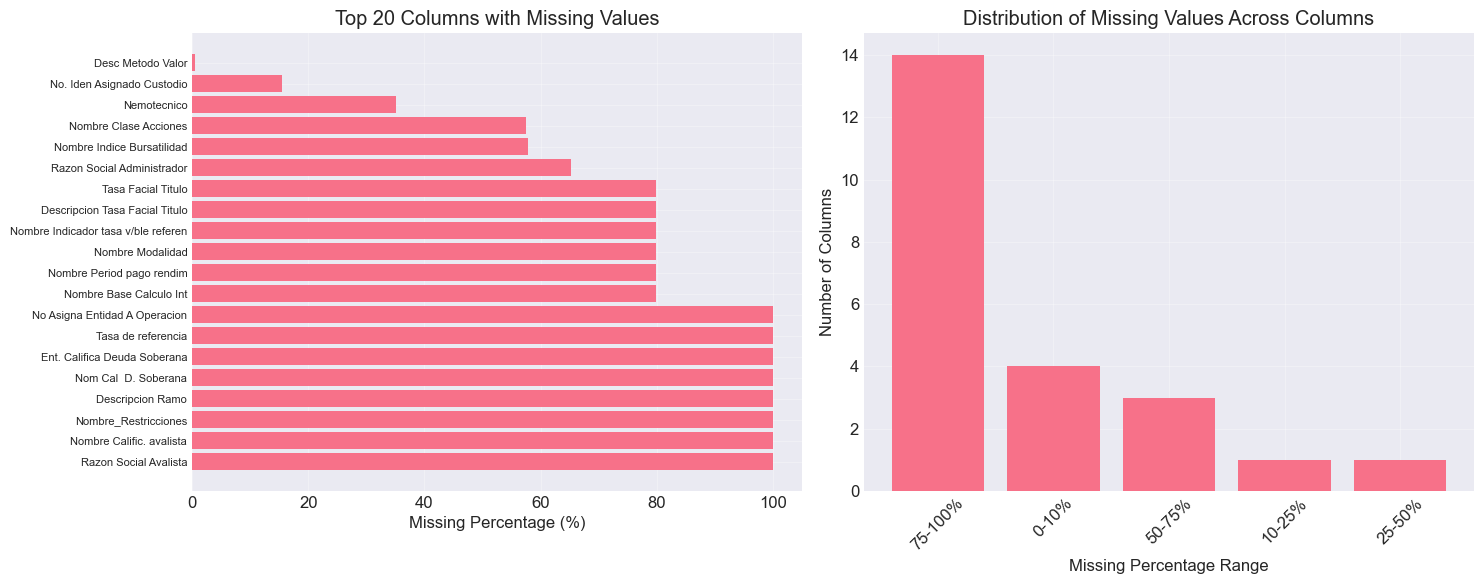

In [9]:
# Create visualization of missing values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Top 20 columns with most missing values
top_missing = missing_data.head(20)
ax1.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
ax1.set_yticks(range(len(top_missing)))
ax1.set_yticklabels(top_missing['Column'], fontsize=8)
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Top 20 Columns with Missing Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of missing values
missing_bins = [0, 10, 25, 50, 75, 100]
missing_labels = ['0-10%', '10-25%', '25-50%', '50-75%', '75-100%']
missing_data['Missing_Bin'] = pd.cut(
    missing_data['Missing_Percentage'], 
    bins=missing_bins, 
    labels=missing_labels
)
missing_dist = missing_data['Missing_Bin'].value_counts()

ax2.bar(range(len(missing_dist)), missing_dist.values)
ax2.set_xticks(range(len(missing_dist)))
ax2.set_xticklabels(missing_dist.index, rotation=45)
ax2.set_ylabel('Number of Columns')
ax2.set_xlabel('Missing Percentage Range')
ax2.set_title('Distribution of Missing Values Across Columns')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

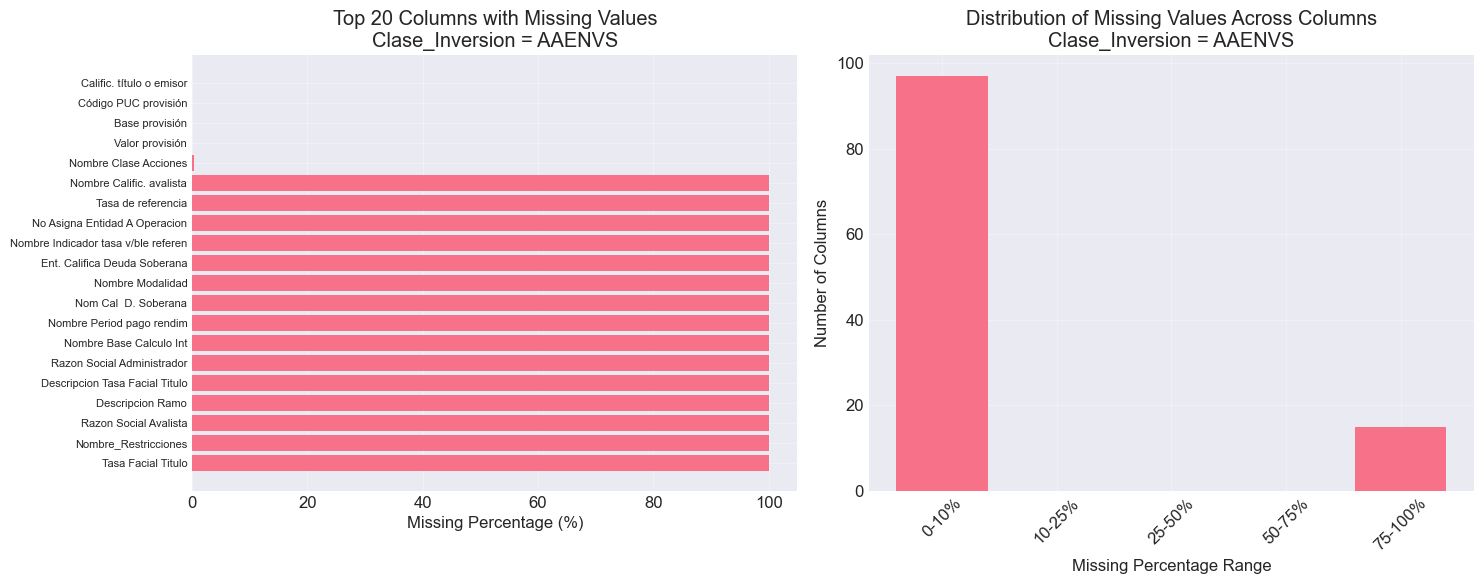

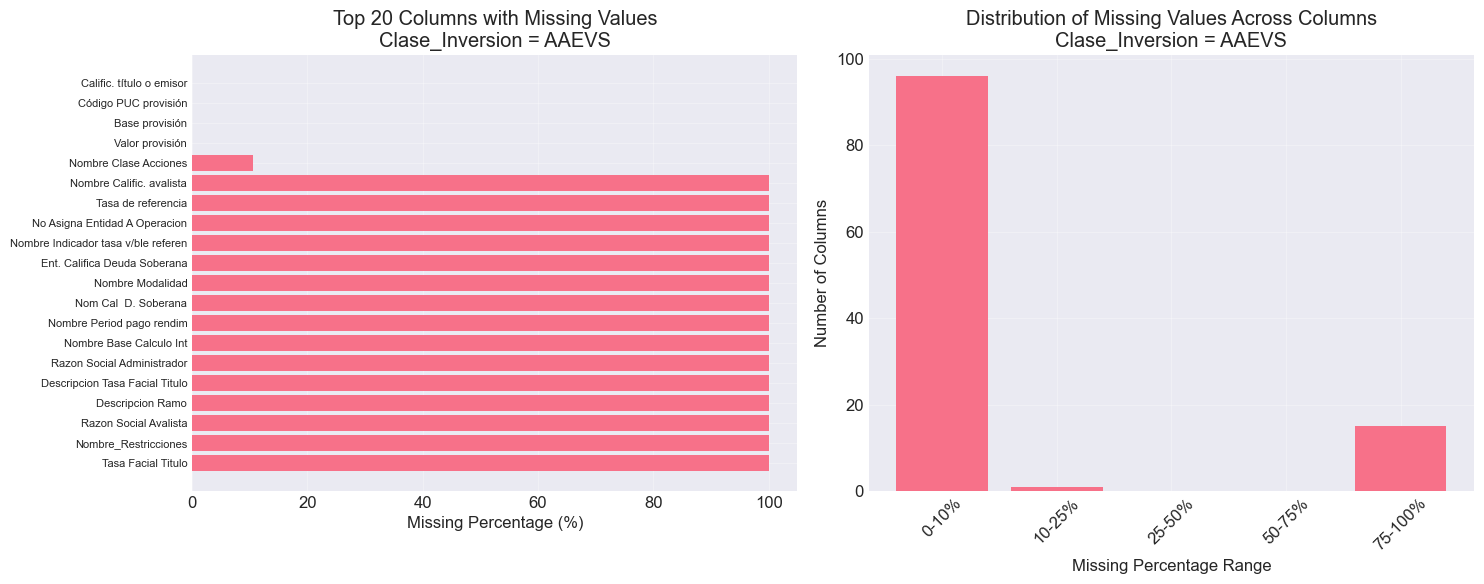

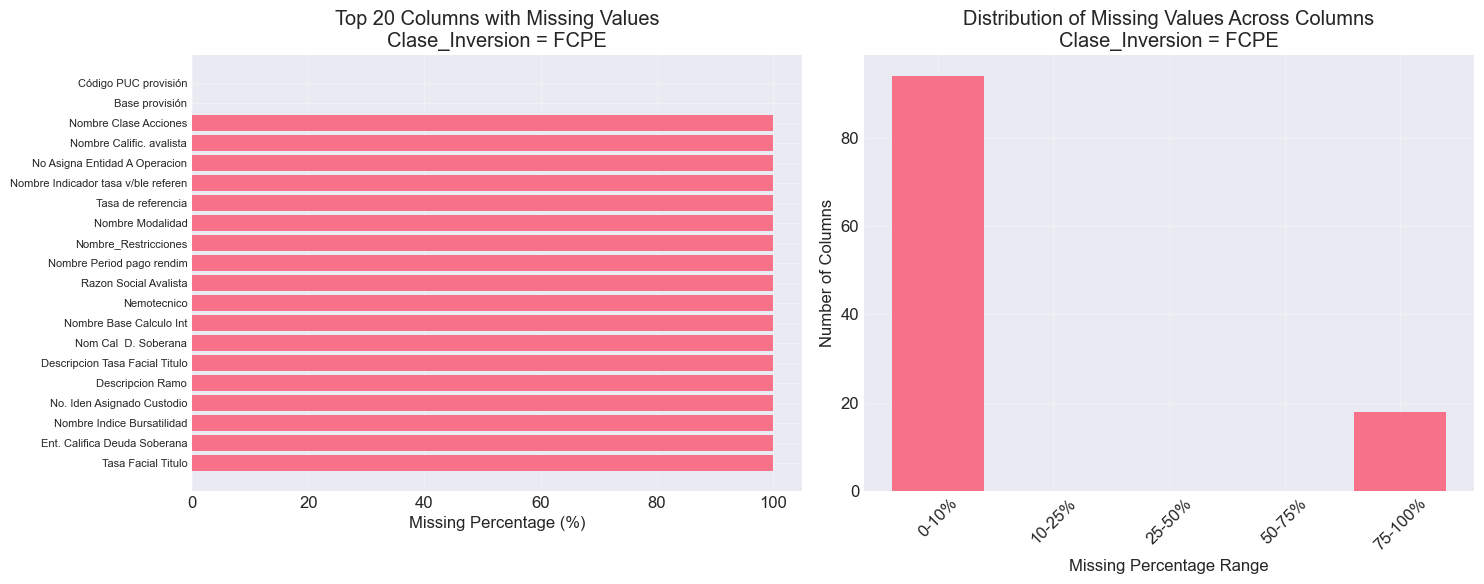

In [43]:

# Clases a graficar
clases = ["AAENVS", "AAEVS", "FCPE"]

for clase in clases:
    # Filtrar por clase de inversión
    subdf = df[df["Clase_Inversion"] == clase]

    if subdf.empty:
        print(f"⚠️ No hay filas para Clase_Inversion = {clase}. Se omite el gráfico.")
        continue

    # Calcular % de faltantes por columna para el sub-dataframe
    # (mean() sobre isna() da proporción; *100 para porcentaje)
    missing_pct = subdf.isna().mean().mul(100)

    # Armar tabla ordenada de faltantes
    missing_data = (
        missing_pct.to_frame(name="Missing_Percentage")
        .reset_index()
        .rename(columns={"index": "Column"})
        .sort_values("Missing_Percentage", ascending=False)
        .reset_index(drop=True)
    )

    # Crear la figura con 2 subplots (exactamente como tu diseño)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # ==== Plot 1: Top 20 columnas con más faltantes ====
    top_missing = missing_data.head(20)
    ax1.barh(range(len(top_missing)), top_missing["Missing_Percentage"])
    ax1.set_yticks(range(len(top_missing)))
    ax1.set_yticklabels(top_missing["Column"], fontsize=8)
    ax1.set_xlabel("Missing Percentage (%)")
    ax1.set_title(f"Top 20 Columns with Missing Values\nClase_Inversion = {clase}")
    ax1.grid(True, alpha=0.3)

    # ==== Plot 2: Distribución de % de faltantes por bins ====
    missing_bins = [0, 10, 25, 50, 75, 100]
    missing_labels = ["0-10%", "10-25%", "25-50%", "50-75%", "75-100%"]

    # Usar una copia para no ensuciar la tabla original
    tmp = missing_data.copy()
    tmp["Missing_Bin"] = pd.cut(
        tmp["Missing_Percentage"],
        bins=missing_bins,
        labels=missing_labels,
        include_lowest=True,
        right=True
    )

    # Contar por bin y asegurar el orden completo de etiquetas
    missing_dist = (
        tmp["Missing_Bin"]
        .value_counts(sort=False)
        .reindex(missing_labels, fill_value=0)
    )

    ax2.bar(range(len(missing_dist)), missing_dist.values)
    ax2.set_xticks(range(len(missing_dist)))
    ax2.set_xticklabels(missing_dist.index, rotation=45)
    ax2.set_ylabel("Number of Columns")
    ax2.set_xlabel("Missing Percentage Range")
    ax2.set_title(f"Distribution of Missing Values Across Columns\nClase_Inversion = {clase}")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


### 📝 Question 2: Missing Data Patterns

Analyze the missing values and answer:

1. **Why might certain financial fields have missing values?**
   - Consider: Different instrument types might not need all fields

2. **Could missing values indicate different types of investments?**
   - Example: Stock fields might be null for bonds

3. **Should we remove columns with >50% missing values? Why or why not?**
   - Think about: Information value vs. noise

**Your analysis:**

1. Reason for missing values: [Write your answer here]

2. Investment type indication: [Write your answer here]

3. Removal strategy: [Write your answer here]

### 2.2 Duplicate Detection

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("🔍 Duplicate Analysis:")
print("="*50)
print(f"Number of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

# Check for duplicates based on key columns
key_columns = ['Nro_Asignado_Por_La_Entidad', 'Fecha de Corte']
existing_key_cols = [col for col in key_columns if col in df.columns]

if existing_key_cols:
    key_duplicates = df.duplicated(subset=existing_key_cols).sum()
    print(f"\nDuplicates based on {existing_key_cols}: {key_duplicates:,}")
else:
    print("\nKey columns not found for duplicate check")

🔍 Duplicate Analysis:
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

Duplicates based on ['Nro_Asignado_Por_La_Entidad', 'Fecha de Corte']: 47


### 2.3 Data Type Corrections

In [11]:
# Identify columns that should be numeric but aren't
print("🔧 Data Type Analysis:")
print("="*50)

# Columns that likely should be numeric
potential_numeric = [
    'Valor Nominal', 
    'Valor_Mercado_O_Pres_Pesos', 
    'Vr. presente en $',
    'Tasa de negociacion', 
    'Días al v/to', 
    'Precio'
]

for col in potential_numeric:
    if col in df.columns:
        dtype = df[col].dtype
        if dtype == 'object':
            print(f"⚠️  '{col}' is type '{dtype}' - converting to numeric...")
            # Clean and convert
            df[col] = pd.to_numeric(
                df[col].astype(str).str.replace(',', ''), 
                errors='coerce'
            )
        else:
            print(f"✅ '{col}' is already numeric type: {dtype}")
    else:
        print(f"❌ '{col}' not found in dataset")

🔧 Data Type Analysis:
⚠️  'Valor Nominal' is type 'object' - converting to numeric...
⚠️  'Valor_Mercado_O_Pres_Pesos' is type 'object' - converting to numeric...
✅ 'Vr. presente en $' is already numeric type: int64
✅ 'Tasa de negociacion' is already numeric type: float64
⚠️  'Días al v/to' is type 'object' - converting to numeric...
⚠️  'Precio' is type 'object' - converting to numeric...


## 📊 Step 3: Univariate Analysis

Let's analyze individual variables to understand their distributions.

### 3.1 Categorical Variables Analysis

#### Investment Classes Distribution

📊 Investment Classes Distribution:
Number of unique investment classes: 41

Top 10 Investment Classes:
Clase_Inversion
AAENVS    1838
AAEVS     1311
FCPE      1022
TSUV       568
FCP        519
AMENVS     359
FINDI      351
TSTF       350
BPEN       294
FCPAPP     210
Name: count, dtype: int64


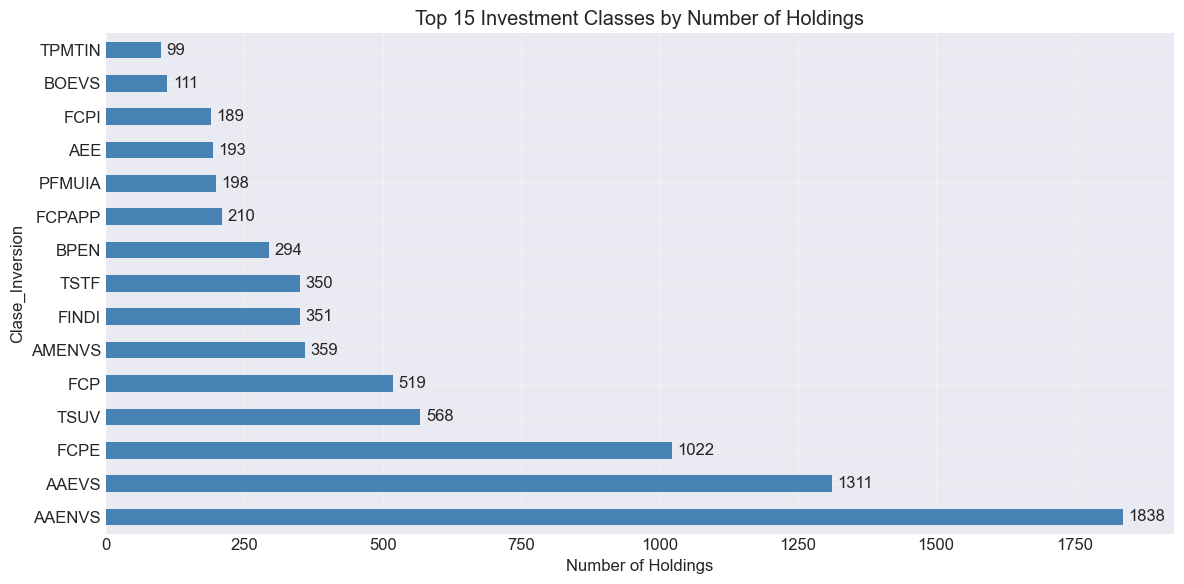

In [12]:
# Analyze investment classes
if 'Clase_Inversion' in df.columns:
    print("📊 Investment Classes Distribution:")
    print("="*50)
    investment_classes = df['Clase_Inversion'].value_counts()
    print(f"Number of unique investment classes: {len(investment_classes)}")
    print("\nTop 10 Investment Classes:")
    print(investment_classes.head(10))
    
    # Visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    investment_classes.head(15).plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Number of Holdings')
    ax.set_title('Top 15 Investment Classes by Number of Holdings')
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(investment_classes.head(15).values):
        ax.text(v + 10, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'Clase_Inversion' column not found")

#### Currency Distribution

💱 Currency Distribution:
Number of different currencies: 8

Currency breakdown:
  PESO: 6,024 (71.40%)
  USD: 1,532 (18.16%)
  UVR: 603 (7.15%)
  EURO: 213 (2.52%)
  GBP: 38 (0.45%)
  MXN: 15 (0.18%)
  JPY: 11 (0.13%)
  OTRA: 1 (0.01%)


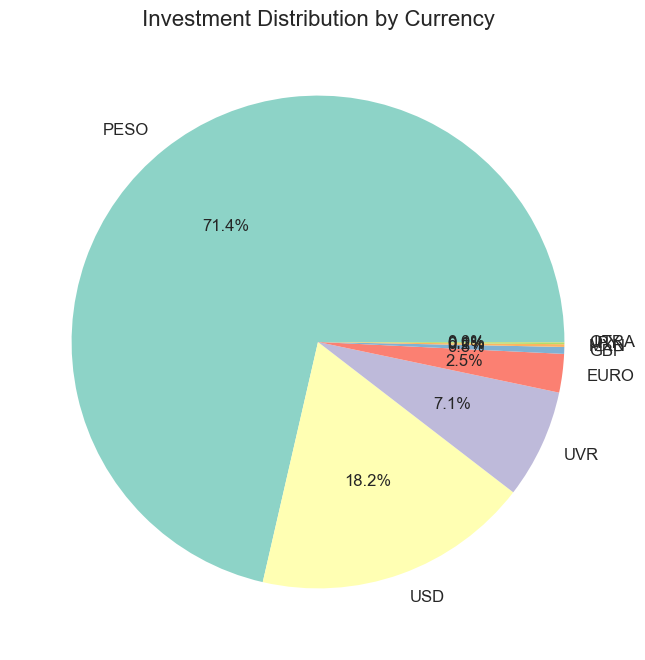

In [13]:
# Analyze currencies
if 'Codigo_Moneda' in df.columns:
    print("💱 Currency Distribution:")
    print("="*50)
    currencies = df['Codigo_Moneda'].value_counts()
    print(f"Number of different currencies: {len(currencies)}")
    print("\nCurrency breakdown:")
    for currency, count in currencies.items():
        print(f"  {currency}: {count:,} ({count/len(df)*100:.2f}%)")
    
    # Pie chart visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = plt.cm.Set3(range(len(currencies)))
    currencies.plot(kind='pie', autopct='%1.1f%%', ax=ax, colors=colors)
    ax.set_ylabel('')
    ax.set_title('Investment Distribution by Currency', fontsize=16)
    plt.show()
else:
    print("❌ 'Codigo_Moneda' column not found")

### 📝 Question 3: Currency Diversification

Based on the currency distribution:

1. **What does the currency mix tell us about the fund's risk strategy?**
2. **Why might a Colombian pension fund invest in foreign currencies?**
3. **What risks does this currency exposure create?**

**Your insights:**

1. Risk strategy insight: [Write your answer here]

2. Reason for foreign investment: [Write your answer here]

3. Currency risk exposure: [Write your answer here]

### 3.2 Numerical Variables Analysis

In [14]:
# Convert and analyze market values
if 'Valor_Mercado_O_Pres_Pesos' in df.columns:
    # Create clean numeric column
    df['Market_Value_Clean'] = pd.to_numeric(
        df['Valor_Mercado_O_Pres_Pesos'].astype(str).str.replace(',', ''),
        errors='coerce'
    )
    
    print("💰 Market Value Analysis:")
    print("="*50)
    print(df['Market_Value_Clean'].describe())
    
    # Portfolio metrics
    total_portfolio = df['Market_Value_Clean'].sum()
    print(f"\nTotal Portfolio Value: ${total_portfolio:,.2f} COP")
    print(f"Total Portfolio Value: ${total_portfolio/1e12:.2f} Trillion COP")
    
    # Concentration analysis
    top_10_holdings = df.nlargest(10, 'Market_Value_Clean')
    top_10_value = top_10_holdings['Market_Value_Clean'].sum()
    print(f"\nTop 10 holdings represent {top_10_value/total_portfolio*100:.2f}% of portfolio")
else:
    print("❌ 'Valor_Mercado_O_Pres_Pesos' column not found")

💰 Market Value Analysis:
count    8.437000e+03
mean     5.698661e+09
std      1.469585e+10
min      0.000000e+00
25%      1.418080e+08
50%      8.424000e+08
75%      4.003130e+09
max      2.374923e+11
Name: Market_Value_Clean, dtype: float64

Total Portfolio Value: $48,079,598,972,932.93 COP
Total Portfolio Value: $48.08 Trillion COP

Top 10 holdings represent 4.03% of portfolio


### Distribution Visualizations

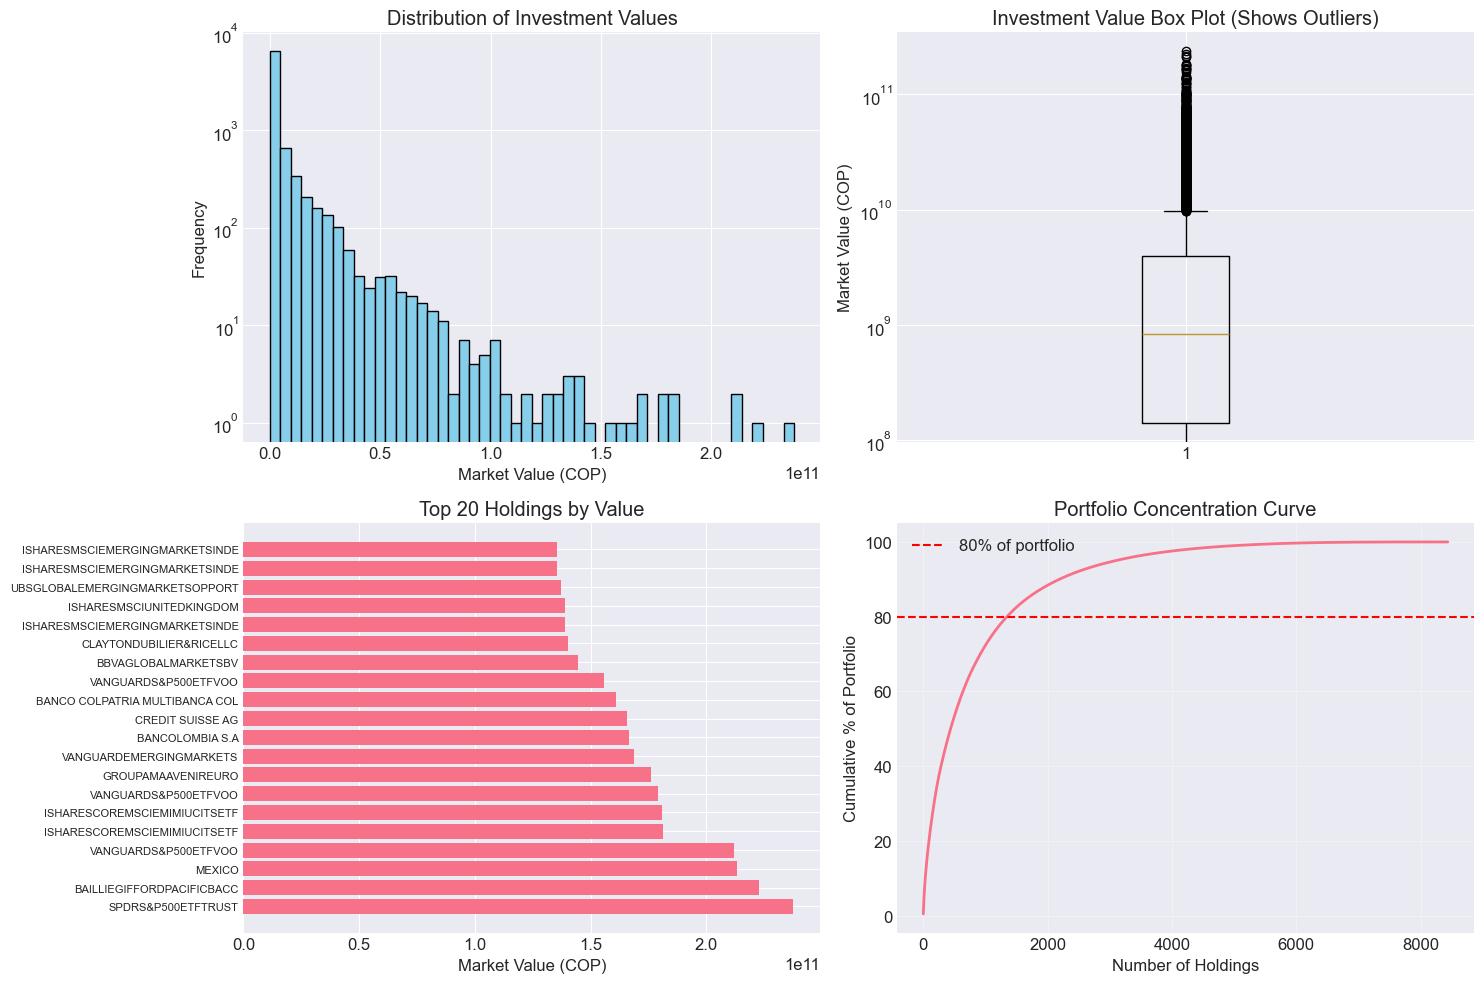

In [15]:
# Create comprehensive distribution analysis
if 'Market_Value_Clean' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Histogram with log scale
    axes[0, 0].hist(df['Market_Value_Clean'].dropna(), bins=50, 
                    edgecolor='black', color='skyblue')
    axes[0, 0].set_xlabel('Market Value (COP)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Investment Values')
    axes[0, 0].set_yscale('log')
    
    # 2. Box plot
    axes[0, 1].boxplot(df['Market_Value_Clean'].dropna())
    axes[0, 1].set_ylabel('Market Value (COP)')
    axes[0, 1].set_title('Investment Value Box Plot (Shows Outliers)')
    axes[0, 1].set_yscale('log')
    
    # 3. Top 20 holdings bar chart
    top_20 = df.nlargest(20, 'Market_Value_Clean')
    if 'Razon_Social_Emisor' in df.columns:
        axes[1, 0].barh(range(len(top_20)), top_20['Market_Value_Clean'].values)
        axes[1, 0].set_yticks(range(len(top_20)))
        axes[1, 0].set_yticklabels(
            [str(x)[:30] for x in top_20['Razon_Social_Emisor'].values], 
            fontsize=8
        )
        axes[1, 0].set_xlabel('Market Value (COP)')
        axes[1, 0].set_title('Top 20 Holdings by Value')
    else:
        axes[1, 0].barh(range(len(top_20)), top_20['Market_Value_Clean'].values)
        axes[1, 0].set_xlabel('Market Value (COP)')
        axes[1, 0].set_title('Top 20 Holdings by Value (No Names Available)')
    
    # 4. Cumulative distribution (Lorenz curve)
    sorted_values = df['Market_Value_Clean'].dropna().sort_values(ascending=False)
    cumsum = sorted_values.cumsum() / sorted_values.sum() * 100
    axes[1, 1].plot(range(len(cumsum)), cumsum.values, linewidth=2)
    axes[1, 1].axhline(y=80, color='r', linestyle='--', label='80% of portfolio')
    axes[1, 1].set_xlabel('Number of Holdings')
    axes[1, 1].set_ylabel('Cumulative % of Portfolio')
    axes[1, 1].set_title('Portfolio Concentration Curve')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Market value data not available for visualization")

**💡 Insight Check:** 
- How many investments make up 50% of the portfolio value?
- What does this tell us about concentration risk?

## 🔗 Step 4: Bivariate Analysis

Now let's explore relationships between variables.

### 4.1 Investment Type vs Value Analysis

In [16]:
# Analyze investment value by class
if 'Clase_Inversion' in df.columns and 'Market_Value_Clean' in df.columns:
    investment_summary = df.groupby('Clase_Inversion').agg({
        'Market_Value_Clean': ['sum', 'mean', 'count']
    }).round(2)
    
    investment_summary.columns = ['Total_Value', 'Avg_Value', 'Count']
    investment_summary['Pct_Portfolio'] = (
        investment_summary['Total_Value'] / 
        investment_summary['Total_Value'].sum() * 100
    ).round(2)
    investment_summary = investment_summary.sort_values('Total_Value', ascending=False)
    
    print("📊 Investment Summary by Class:")
    print("="*80)
    print(investment_summary.head(10))
else:
    print("❌ Required columns not available for investment class analysis")

📊 Investment Summary by Class:
                  Total_Value     Avg_Value  Count  Pct_Portfolio
Clase_Inversion                                                  
TSUV             1.030893e+13  1.814952e+10    568          21.44
FINDI            8.883441e+12  2.530895e+10    351          18.48
FCPE             5.464222e+12  5.346597e+09   1022          11.36
TSTF             4.706551e+12  1.344729e+10    350           9.79
PFMUIA           3.992999e+12  2.016666e+10    198           8.30
AAENVS           3.502529e+12  1.905620e+09   1838           7.28
AAEVS            2.322934e+12  1.771880e+09   1311           4.83
PEEBE            1.334144e+12  4.764800e+10     28           2.77
FCPAPP           7.375331e+11  3.512062e+09    210           1.53
BOEVS            6.204785e+11  5.589897e+09    111           1.29


### Visualization: Investment Class Analysis

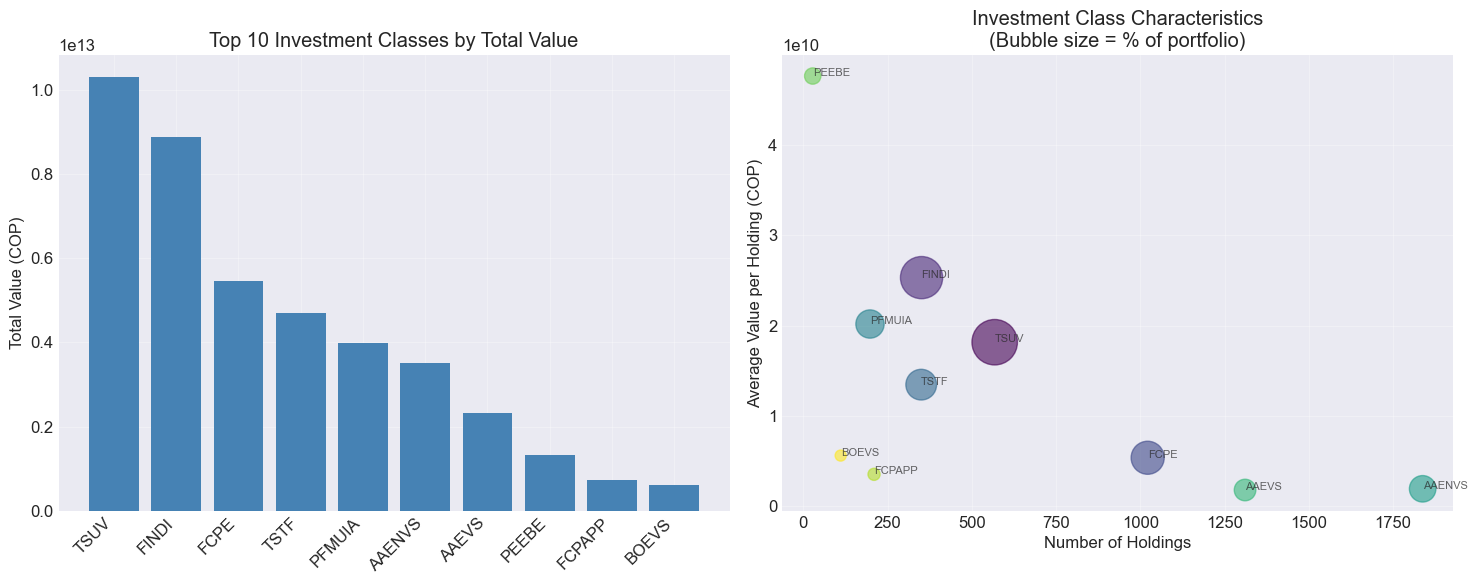

In [17]:
# Create dual visualization
if 'investment_summary' in locals():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Total value by class
    top_classes = investment_summary.head(10)
    bars = ax1.bar(range(len(top_classes)), top_classes['Total_Value'].values, 
                   color='steelblue')
    ax1.set_xticks(range(len(top_classes)))
    ax1.set_xticklabels([str(x)[:15] for x in top_classes.index], 
                         rotation=45, ha='right')
    ax1.set_ylabel('Total Value (COP)')
    ax1.set_title('Top 10 Investment Classes by Total Value')
    ax1.grid(True, alpha=0.3)

    # Average value vs count (bubble chart)
    scatter = ax2.scatter(top_classes['Count'], 
                         top_classes['Avg_Value'],
                         s=top_classes['Pct_Portfolio']*50, 
                         alpha=0.6,
                         c=range(len(top_classes)),
                         cmap='viridis')
    ax2.set_xlabel('Number of Holdings')
    ax2.set_ylabel('Average Value per Holding (COP)')
    ax2.set_title('Investment Class Characteristics\n(Bubble size = % of portfolio)')
    ax2.grid(True, alpha=0.3)

    # Add labels to bubbles
    for idx, row in top_classes.iterrows():
        ax2.annotate(str(idx)[:10], 
                    (row['Count'], row['Avg_Value']),
                    fontsize=8, alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("❌ Investment summary not available for visualization")

### 📝 Question 4: Portfolio Strategy

Based on the investment class analysis:

1. **Which investment classes dominate the portfolio?**
2. **Is the fund taking a concentrated or diversified approach?**
3. **What does the average value per holding tell us about investment strategy?**

**Your analysis:**

1. Dominant investment classes: [Write your answer here]

2. Concentration vs diversification: [Write your answer here]

3. Investment strategy insight: [Write your answer here]

### 4.2 Country Risk Analysis

In [18]:
# Analyze investments by country
if 'Pais_Emisor' in df.columns and 'Market_Value_Clean' in df.columns:
    country_analysis = df.groupby('Pais_Emisor').agg({
        'Market_Value_Clean': ['sum', 'count', 'mean']
    }).round(2)
    
    country_analysis.columns = ['Total_Value', 'Num_Investments', 'Avg_Investment']
    country_analysis['Pct_Portfolio'] = (
        country_analysis['Total_Value'] / 
        country_analysis['Total_Value'].sum() * 100
    ).round(2)
    country_analysis = country_analysis.sort_values('Total_Value', ascending=False)
    
    print("🌍 Geographic Distribution of Investments:")
    print("="*80)
    print(country_analysis.head(15))
else:
    print("❌ Required columns not available for country analysis")

🌍 Geographic Distribution of Investments:
                            Total_Value  Num_Investments  Avg_Investment  \
Pais_Emisor                                                                
Colombia                   2.577902e+13             6524    3.951413e+09   
Estados Unidos de América  1.324681e+13             1243    1.065713e+10   
Luxemburgo                 3.055130e+12              230    1.328318e+10   
Irlanda                    1.755817e+12               47    3.735780e+10   
Reino Unido                1.476330e+12              140    1.054521e+10   
México                     6.572056e+11               24    2.738357e+10   
No_Aplica                  5.815816e+11               48    1.211628e+10   
Francia                    4.038677e+11               13    3.106675e+10   
Suiza                      3.723652e+11               20    1.861826e+10   
España                     3.336800e+11              121    2.757686e+09   
Islas Caimán               1.777537e+11       

### Geographic Distribution Visualization

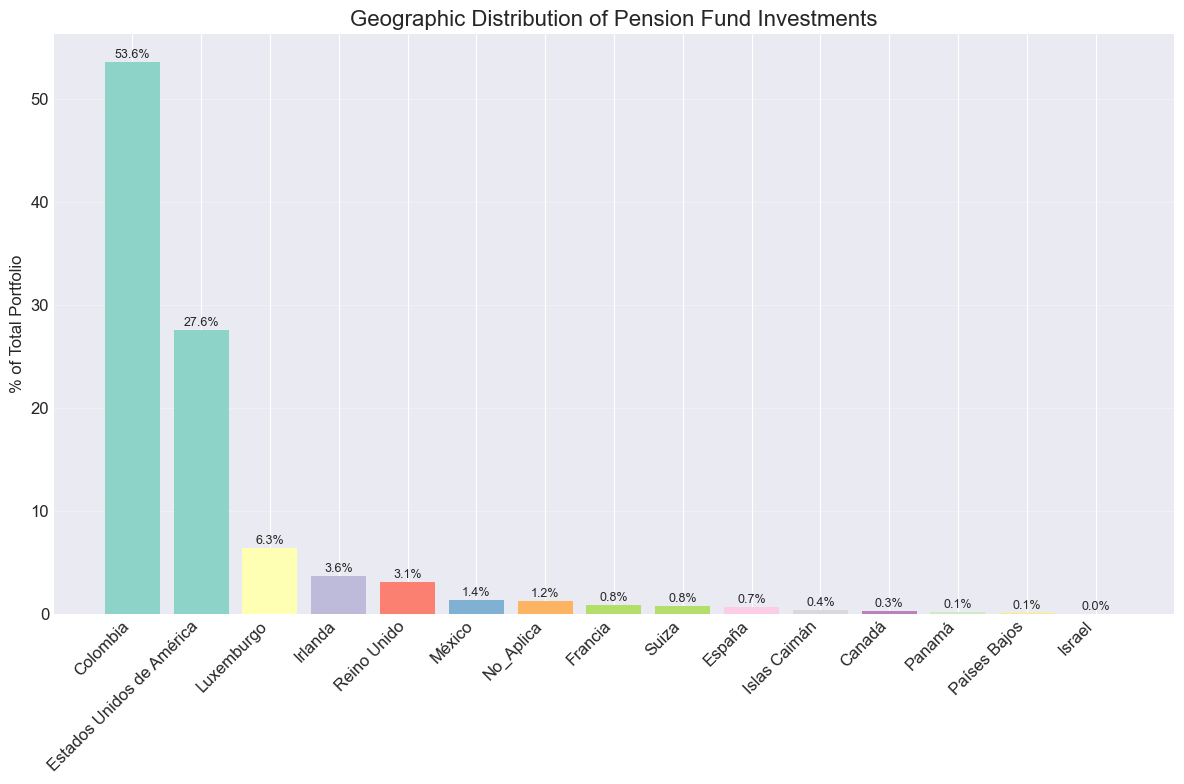

In [19]:
# Create geographic distribution chart
if 'country_analysis' in locals():
    fig, ax = plt.subplots(figsize=(12, 8))

    top_countries = country_analysis.head(15)
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_countries)))

    bars = ax.bar(range(len(top_countries)), 
                  top_countries['Pct_Portfolio'].values, 
                  color=colors)
    ax.set_xticks(range(len(top_countries)))
    ax.set_xticklabels(top_countries.index, rotation=45, ha='right')
    ax.set_ylabel('% of Total Portfolio')
    ax.set_title('Geographic Distribution of Pension Fund Investments', fontsize=16)
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, top_countries['Pct_Portfolio'].values)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("❌ Country analysis not available for visualization")

## 🌐 Step 5: Multivariate Analysis

Let's analyze multiple variables simultaneously to find complex patterns.

### 5.1 Investment Class × Currency Analysis

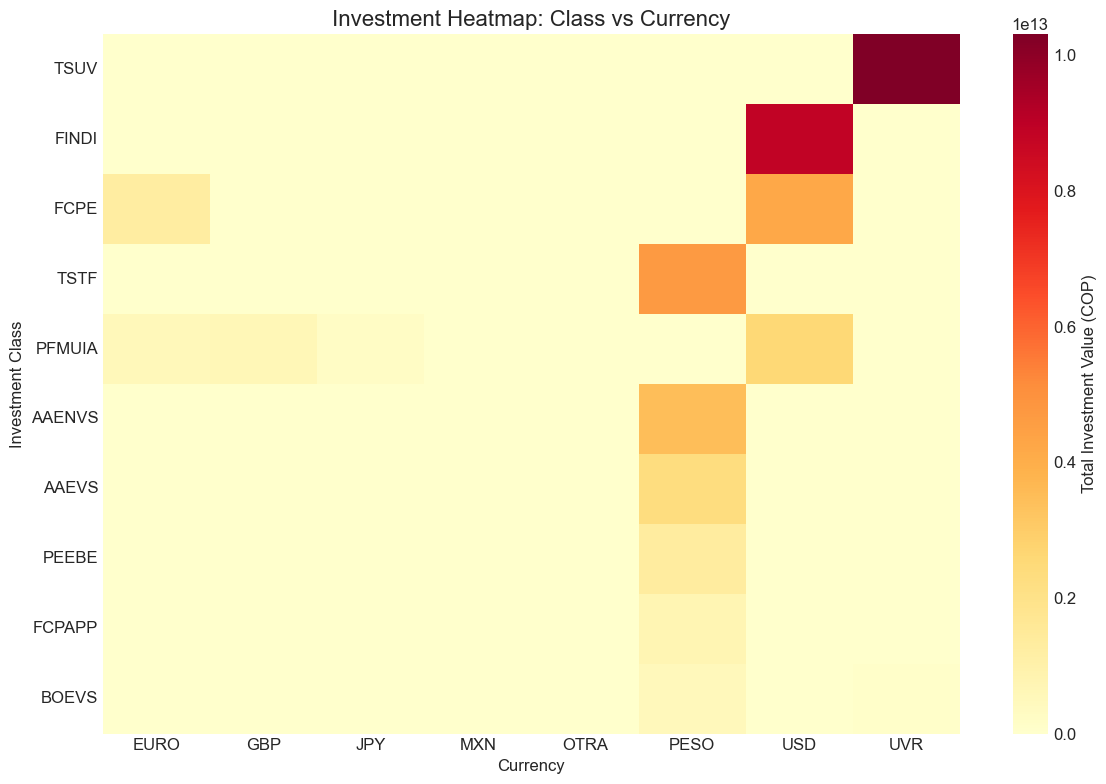

In [20]:
# Multi-dimensional analysis
required_cols = ['Clase_Inversion', 'Codigo_Moneda', 'Market_Value_Clean']
if all(col in df.columns for col in required_cols):
    # Create pivot table
    pivot_data = df.pivot_table(
        values='Market_Value_Clean',
        index='Clase_Inversion',
        columns='Codigo_Moneda',
        aggfunc='sum',
        fill_value=0
    )
    
    # Select top classes for visualization
    top_classes_multi = pivot_data.sum(axis=1).nlargest(10).index
    pivot_subset = pivot_data.loc[top_classes_multi]
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(pivot_subset, 
                annot=False, 
                fmt='.0f', 
                cmap='YlOrRd',
                cbar_kws={'label': 'Total Investment Value (COP)'})
    ax.set_title('Investment Heatmap: Class vs Currency', fontsize=16)
    ax.set_xlabel('Currency')
    ax.set_ylabel('Investment Class')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Required columns not available: {required_cols}")
    print(f"Available columns include: {[col for col in required_cols if col in df.columns]}")

### 5.2 Portfolio Segmentation

In [21]:
# Create investment segments based on value
if 'Market_Value_Clean' in df.columns:
    # Define segments
    df['Investment_Segment'] = pd.cut(
        df['Market_Value_Clean'],
        bins=[0, 1e9, 10e9, 50e9, 100e9, float('inf')],
        labels=['Small (<1B)', 'Medium (1-10B)', 'Large (10-50B)', 
                'Very Large (50-100B)', 'Mega (>100B)']
    )
    
    # Analyze segments
    segment_analysis = df.groupby('Investment_Segment').agg({
        'Market_Value_Clean': ['count', 'sum', 'mean']
    }).round(2)
    
    segment_analysis.columns = ['Count', 'Total_Value', 'Avg_Value']
    segment_analysis['Pct_Count'] = (
        segment_analysis['Count'] / segment_analysis['Count'].sum() * 100
    ).round(2)
    segment_analysis['Pct_Value'] = (
        segment_analysis['Total_Value'] / segment_analysis['Total_Value'].sum() * 100
    ).round(2)
    
    print("📊 Portfolio Segmentation Analysis:")
    print("="*80)
    print(segment_analysis)
else:
    print("❌ Market value data not available for segmentation")

📊 Portfolio Segmentation Analysis:
                      Count   Total_Value     Avg_Value  Pct_Count  Pct_Value
Investment_Segment                                                           
Small (<1B)            4484  1.218776e+12  2.718055e+08      53.16       2.53
Medium (1-10B)         2735  9.605146e+12  3.511936e+09      32.42      19.98
Large (10-50B)         1035  2.241412e+13  2.165616e+10      12.27      46.62
Very Large (50-100B)    145  9.649841e+12  6.655063e+10       1.72      20.07
Mega (>100B)             36  5.191715e+12  1.442143e+11       0.43      10.80


### Segment Distribution Visualization

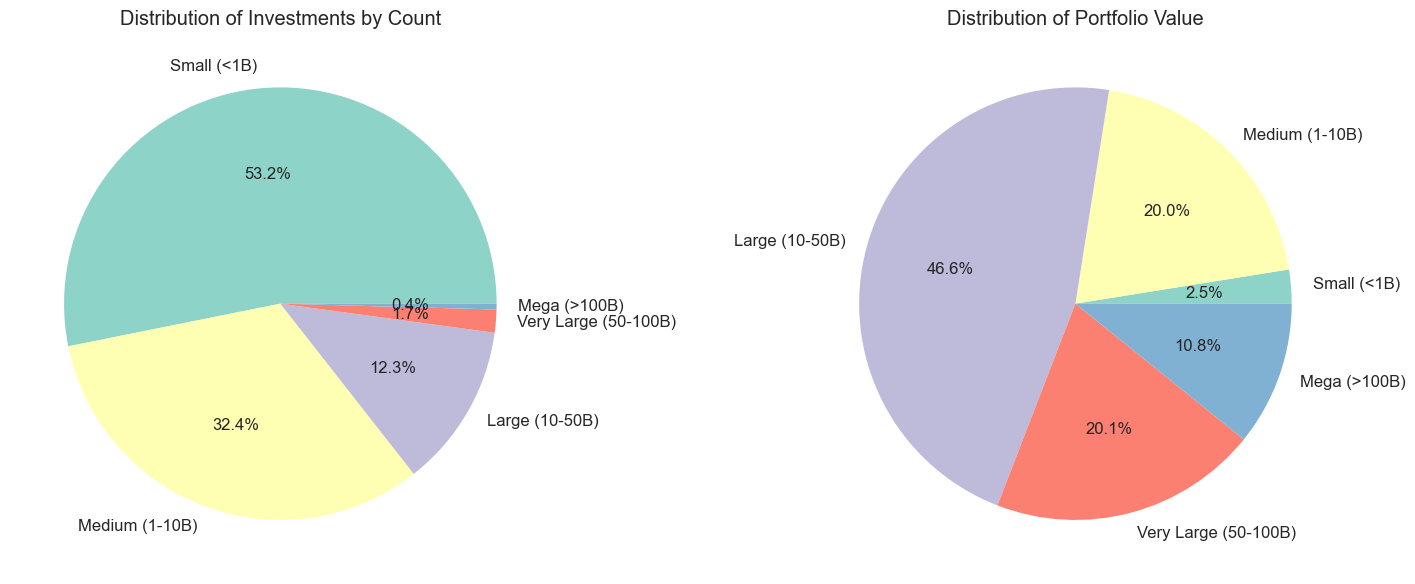

In [22]:
# Create comparative pie charts
if 'segment_analysis' in locals():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Distribution by count
    segment_analysis['Pct_Count'].plot(kind='pie', ax=ax1, autopct='%1.1f%%',
                                       colors=plt.cm.Set3.colors)
    ax1.set_title('Distribution of Investments by Count')
    ax1.set_ylabel('')

    # Distribution by value
    segment_analysis['Pct_Value'].plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                       colors=plt.cm.Set3.colors)
    ax2.set_title('Distribution of Portfolio Value')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("❌ Segment analysis not available for visualization")

### 📝 Question 5: Portfolio Concentration Risk

Based on the segmentation analysis:

1. **How concentrated is the portfolio? Is this healthy?**
2. **What percentage of holdings represent 80% of the portfolio value?**
3. **What are the implications for risk management?**

**Your risk assessment:**

1. Concentration level: [Write your answer here]

2. 80% portfolio concentration: [Write your answer here]

3. Risk management implications: [Write your answer here]

## 📈 Step 6: Key Performance Indicators (KPIs)

Let's calculate and display critical metrics for decision-making.

In [23]:
# Calculate comprehensive KPIs
print("📈 Key Performance Indicators (KPIs):")
print("="*80)

if 'Market_Value_Clean' in df.columns and 'total_portfolio' in locals():
    # Basic metrics
    num_investments = len(df)
    avg_investment = df['Market_Value_Clean'].mean()
    median_investment = df['Market_Value_Clean'].median()
    
    # Concentration metrics
    top_10_pct = (df.nlargest(10, 'Market_Value_Clean')['Market_Value_Clean'].sum() / 
                  total_portfolio * 100)
    top_50_pct = (df.nlargest(50, 'Market_Value_Clean')['Market_Value_Clean'].sum() / 
                  total_portfolio * 100)
    
    # Find how many holdings make up 80% of portfolio
    sorted_values = df['Market_Value_Clean'].sort_values(ascending=False)
    cumsum_pct = sorted_values.cumsum() / total_portfolio * 100
    holdings_for_80pct = (cumsum_pct <= 80).sum()
    
    # Diversification metrics
    num_currencies = df['Codigo_Moneda'].nunique() if 'Codigo_Moneda' in df.columns else 'N/A'
    num_countries = df['Pais_Emisor'].nunique() if 'Pais_Emisor' in df.columns else 'N/A'
    num_investment_classes = df['Clase_Inversion'].nunique() if 'Clase_Inversion' in df.columns else 'N/A'
    
    # Display KPIs
    print("\n📊 PORTFOLIO METRICS:")
    print(f"  • Total Portfolio Value: ${total_portfolio:,.0f} COP")
    print(f"  • Total Portfolio Value: ${total_portfolio/1e12:.2f} Trillion COP")
    print(f"  • Number of Investments: {num_investments:,}")
    print(f"  • Average Investment Size: ${avg_investment:,.0f} COP")
    print(f"  • Median Investment Size: ${median_investment:,.0f} COP")
    
    print("\n⚠️  CONCENTRATION METRICS:")
    print(f"  • Top 10 Holdings: {top_10_pct:.2f}% of portfolio")
    print(f"  • Top 50 Holdings: {top_50_pct:.2f}% of portfolio")
    print(f"  • Holdings for 80% of value: {holdings_for_80pct} investments")
    
    print("\n🌍 DIVERSIFICATION METRICS:")
    print(f"  • Number of Currencies: {num_currencies}")
    print(f"  • Number of Countries: {num_countries}")
    print(f"  • Number of Investment Classes: {num_investment_classes}")
else:
    print("❌ Required data not available for KPI calculation")

📈 Key Performance Indicators (KPIs):

📊 PORTFOLIO METRICS:
  • Total Portfolio Value: $48,079,598,972,933 COP
  • Total Portfolio Value: $48.08 Trillion COP
  • Number of Investments: 8,437
  • Average Investment Size: $5,698,660,540 COP
  • Median Investment Size: $842,400,000 COP

⚠️  CONCENTRATION METRICS:
  • Top 10 Holdings: 4.03% of portfolio
  • Top 50 Holdings: 13.54% of portfolio
  • Holdings for 80% of value: 1346 investments

🌍 DIVERSIFICATION METRICS:
  • Number of Currencies: 8
  • Number of Countries: 15
  • Number of Investment Classes: 41


## 💡 Step 7: Generate Business Insights

Let's automatically generate insights based on our analysis.

In [24]:
# Generate automated insights
print("💡 Key Insights from EDA:")
print("="*80)

insights = []

# Only generate insights if we have the necessary data
if 'top_10_pct' in locals():
    # Insight 1: Portfolio concentration
    if top_10_pct > 50:
        insights.append(f"⚠️ HIGH CONCENTRATION RISK: Top 10 holdings = {top_10_pct:.1f}% of portfolio")
    elif top_10_pct > 30:
        insights.append(f"📊 MODERATE CONCENTRATION: Top 10 holdings = {top_10_pct:.1f}% of portfolio")
    else:
        insights.append(f"✅ WELL DIVERSIFIED: Top 10 holdings = {top_10_pct:.1f}% of portfolio")

# Insight 2: Currency exposure
if 'Codigo_Moneda' in df.columns and 'Market_Value_Clean' in df.columns and 'total_portfolio' in locals():
    cop_investments = df[df['Codigo_Moneda'] == 'COP']['Market_Value_Clean'].sum()
    foreign_exposure = (total_portfolio - cop_investments) / total_portfolio * 100
    if foreign_exposure > 40:
        insights.append(f"🌍 HIGH FOREIGN EXPOSURE: {foreign_exposure:.1f}% in foreign currencies")
    else:
        insights.append(f"🏠 DOMESTIC FOCUSED: {100-foreign_exposure:.1f}% in Colombian Pesos")

# Insight 3: Investment efficiency
if 'avg_investment' in locals() and 'median_investment' in locals():
    if avg_investment > median_investment * 10:
        insights.append("📈 HIGHLY SKEWED: Few large investments dominate")
    else:
        insights.append("📊 BALANCED: Investment sizes are relatively uniform")

# Insight 4: Data quality
missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100)
if missing_pct > 30:
    insights.append(f"⚠️ DATA QUALITY ISSUE: {missing_pct:.1f}% missing data")
else:
    insights.append(f"✅ GOOD DATA QUALITY: Only {missing_pct:.1f}% missing data")

# Insight 5: Portfolio complexity
if 'num_investments' in locals():
    if num_investments > 5000:
        insights.append(f"🔄 COMPLEX PORTFOLIO: Managing {num_investments:,} positions")
    else:
        insights.append(f"📋 MANAGEABLE PORTFOLIO: {num_investments:,} positions")

# Display insights
print("\n🎯 KEY INSIGHTS:\n")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

if not insights:
    print("❌ Insufficient data to generate automated insights")

💡 Key Insights from EDA:

🎯 KEY INSIGHTS:

1. ✅ WELL DIVERSIFIED: Top 10 holdings = 4.0% of portfolio
2. 🌍 HIGH FOREIGN EXPOSURE: 100.0% in foreign currencies
3. 📊 BALANCED: Investment sizes are relatively uniform
4. ✅ GOOD DATA QUALITY: Only 13.3% missing data
5. 🔄 COMPLEX PORTFOLIO: Managing 8,437 positions


## 📝 Step 8: Final Exercise - Policy Recommendations

### Your Turn: Generate 5 Policy Recommendations

Based on your complete EDA, provide **5 specific, actionable recommendations** for:

1. **Risk Management Improvements**
   - What concentration limits should be implemented?
   - How can the fund better manage currency risk?

2. **Portfolio Optimization Strategies**
   - Which asset classes should be increased/decreased?
   - What rebalancing strategies would improve returns?

3. **Regulatory Compliance Considerations**
   - Are there regulatory limits being approached?
   - What monitoring systems should be implemented?

4. **Data Collection Improvements**
   - Which data fields need better quality control?
   - What additional data would enhance analysis?

5. **Future Analysis Priorities**
   - What deeper analyses should be conducted?
   - Which patterns require further investigation?

### Template for Your Recommendations:

**POLICY RECOMMENDATIONS FOR COLFONDOS S.A.**
==========================================

**1. RISK MANAGEMENT:**
- [Your specific recommendation]
- Expected impact: [Quantify if possible]
- Implementation timeline: [Immediate/Short-term/Long-term]

**2. PORTFOLIO OPTIMIZATION:**
- [Your specific recommendation]
- Expected impact: [Quantify if possible]
- Implementation timeline: [Immediate/Short-term/Long-term]

**3. REGULATORY COMPLIANCE:**
- [Your specific recommendation]
- Expected impact: [Quantify if possible]
- Implementation timeline: [Immediate/Short-term/Long-term]

**4. DATA QUALITY:**
- [Your specific recommendation]
- Expected impact: [Quantify if possible]
- Implementation timeline: [Immediate/Short-term/Long-term]

**5. FUTURE ANALYSIS:**
- [Your specific recommendation]
- Expected impact: [Quantify if possible]
- Implementation timeline: [Immediate/Short-term/Long-term]

**EXPECTED OVERALL IMPACT:**
[Describe the combined benefits of implementing all recommendations]

## 📊 Step 9: Create Executive Summary

In [25]:
# Generate executive summary
if 'total_portfolio' in locals() and 'num_investments' in locals():
    executive_summary = f"""
EXECUTIVE SUMMARY - COLFONDOS PORTFOLIO ANALYSIS
================================================

Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}
Dataset: Colfondos_20250830.csv

KEY METRICS:
• Portfolio Value: ${total_portfolio/1e12:.2f} Trillion COP
• Total Investments: {num_investments:,}
• Geographic Reach: {num_countries if 'num_countries' in locals() else 'N/A'} countries
• Currency Exposure: {num_currencies if 'num_currencies' in locals() else 'N/A'} currencies

RISK PROFILE:
• Concentration: Top 10 holdings = {top_10_pct:.1f}% of portfolio
• Foreign Exposure: {foreign_exposure:.1f}% (if calculated)
• Data Quality Score: {100 - missing_pct:.1f}%

TOP 3 PRIORITIES:
1. {insights[0] if len(insights) > 0 else 'Analysis pending'}
2. {insights[1] if len(insights) > 1 else 'Analysis pending'}
3. {insights[2] if len(insights) > 2 else 'Analysis pending'}

RECOMMENDATION:
[Your main recommendation based on the analysis]
    """
    
    print(executive_summary)
else:
    print("❌ Insufficient data available for executive summary")


EXECUTIVE SUMMARY - COLFONDOS PORTFOLIO ANALYSIS

Date: 2025-08-31
Dataset: Colfondos_20250830.csv

KEY METRICS:
• Portfolio Value: $48.08 Trillion COP
• Total Investments: 8,437
• Geographic Reach: 15 countries
• Currency Exposure: 8 currencies

RISK PROFILE:
• Concentration: Top 10 holdings = 4.0% of portfolio
• Foreign Exposure: 100.0% (if calculated)
• Data Quality Score: 86.7%

TOP 3 PRIORITIES:
1. ✅ WELL DIVERSIFIED: Top 10 holdings = 4.0% of portfolio
2. 🌍 HIGH FOREIGN EXPOSURE: 100.0% in foreign currencies
3. 📊 BALANCED: Investment sizes are relatively uniform

RECOMMENDATION:
[Your main recommendation based on the analysis]
    


## 🎯 Workshop Summary

### What We've Accomplished:

✅ **Loaded and explored** a complex financial dataset with 8,400+ records  
✅ **Assessed data quality** identifying patterns in missing values  
✅ **Performed univariate analysis** on key variables  
✅ **Conducted bivariate analysis** to find relationships  
✅ **Applied multivariate techniques** for deeper insights  
✅ **Generated KPIs** for executive decision-making  
✅ **Created actionable recommendations** based on evidence  

### Key Takeaways:

1. **Systematic EDA is crucial** - Follow a structured approach
2. **Data quality matters** - Clean data leads to reliable insights
3. **Visualization communicates** - Charts reveal patterns numbers hide
4. **Context is king** - Domain knowledge enhances interpretation
5. **Insights drive action** - Analysis without recommendations is incomplete

### Skills You've Developed:

- 📊 Data profiling and quality assessment
- 📈 Statistical analysis and interpretation
- 🎨 Effective data visualization
- 💡 Pattern recognition and anomaly detection
- 📝 Business insight generation
- 🎯 Strategic recommendation formulation

## 🚀 Next Steps

### Continue Your Learning:

1. **Practice with Different Datasets**
   - Try other datos.gov.co datasets
   - Apply the same methodology
   - Compare patterns across sectors

2. **Advanced Techniques**
   - Learn correlation analysis
   - Explore time series decomposition
   - Study outlier detection methods

3. **Automation**
   - Create reusable EDA functions
   - Build automated reporting pipelines
   - Develop data quality monitoring

4. **Visualization Mastery**
   - Learn interactive visualizations (Plotly, Bokeh)
   - Create dashboards (Streamlit, Dash)
   - Master storytelling with data

5. **Machine Learning Connection**
   - Use EDA findings for feature engineering
   - Identify target variables for prediction
   - Understand data requirements for ML models

## 🎉 Congratulations!

You've completed a comprehensive EDA on real Colombian pension fund data!

**Remember:**
- Every dataset tells a story
- Good analysis leads to better decisions
- Practice makes perfect
- Always question your findings
- Share your insights to create impact

### Final Challenge:
Can you find one pattern in the data that we didn't explore? What question would you ask next?

---

**Happy Analyzing! 🚀**

*"In God we trust, all others must bring data."* - W. Edwards Deming